In [ ]:
!pip install dss_python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.8/431.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 47.0 MB/s eta 0:00:00


In [ ]:
from dss import DSS ,plot
import pandas as pd
import gym
import tensorflow as tf
from tensorflow.keras import layers,Sequential, utils
import numpy as np
import matplotlib.pyplot as plt
from collections import deque


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/drive


In [ ]:
dss_file='/content/drive/MyDrive/FYP/ieee37_PV21_creterion6.dss'
load_path='/content/drive/MyDrive/FYP/DATAS/load_data_final6'
irradiance_path='/content/drive/MyDrive/FYP/FINAL_profiles/Irradianceandload/Irradiance_monthly.csv'


In [ ]:
DSS.Text.Command='clear'
DSS.Text.Command='New object=circuit.ieee37 basekv=230 pu=1.0 MVAsc3=100 MVAsc1=100'
# Substation Transformer
DSS.Text.Command='New Transformer.SubXF Phases=3 Windings=2 Xhl=8 wdg=1 bus=sourcebus conn=Delta kv=230   kva=2500   %r=1 wdg=2 bus=799  conn=Delta kv=4.8   kva=2500   %r=1'
# Load Transformer
DSS.Text.Command='New Transformer.XFM1  Phases=3 Windings=2 Xhl=1.81 wdg=1 bus=709 conn=Delta kv=4.8  kva=1000  %r=0.045 wdg=2 bus=775  conn=Delta kv=0.48  kva=1000    %r=0.045'
DSS.Text.Command = "Set Datapath=[/content/drive/MyDrive/FYP]";
# import line codes with phase impedance matrices
DSS.Text.Command='Redirect        IEEELineCodes.dss'

# Lines
DSS.Text.Command='New Line.L1     Phases=3 Bus1=701.1.2.3  Bus2=702.1.2.3  LineCode=722  Length=0.96'
DSS.Text.Command='New Line.L2     Phases=3 Bus1=702.1.2.3  Bus2=705.1.2.3  LineCode=724  Length=0.4'
DSS.Text.Command='New Line.L3     Phases=3 Bus1=702.1.2.3  Bus2=713.1.2.3  LineCode=723  Length=0.36'
DSS.Text.Command='New Line.L4     Phases=3 Bus1=702.1.2.3  Bus2=703.1.2.3  LineCode=722  Length=1.32'
DSS.Text.Command='New Line.L5     Phases=3 Bus1=703.1.2.3  Bus2=727.1.2.3  LineCode=724  Length=0.24'
DSS.Text.Command='New Line.L6     Phases=3 Bus1=703.1.2.3  Bus2=730.1.2.3  LineCode=723  Length=0.6'
DSS.Text.Command='New Line.L7     Phases=3 Bus1=704.1.2.3  Bus2=714.1.2.3  LineCode=724  Length=0.08'
DSS.Text.Command='New Line.L8     Phases=3 Bus1=704.1.2.3  Bus2=720.1.2.3  LineCode=723  Length=0.8'
DSS.Text.Command='New Line.L9     Phases=3 Bus1=705.1.2.3  Bus2=742.1.2.3  LineCode=724  Length=0.32'
DSS.Text.Command='New Line.L10    Phases=3 Bus1=705.1.2.3  Bus2=712.1.2.3  LineCode=724  Length=0.24'
DSS.Text.Command='New Line.L11    Phases=3 Bus1=706.1.2.3  Bus2=725.1.2.3  LineCode=724  Length=0.28'
DSS.Text.Command='New Line.L12    Phases=3 Bus1=707.1.2.3  Bus2=724.1.2.3  LineCode=724  Length=0.76'
DSS.Text.Command='New Line.L13    Phases=3 Bus1=707.1.2.3  Bus2=722.1.2.3  LineCode=724  Length=0.12'
DSS.Text.Command='New Line.L14    Phases=3 Bus1=708.1.2.3  Bus2=733.1.2.3  LineCode=723  Length=0.32'
DSS.Text.Command='New Line.L15    Phases=3 Bus1=708.1.2.3  Bus2=732.1.2.3  LineCode=724  Length=0.32'
DSS.Text.Command='New Line.L16    Phases=3 Bus1=709.1.2.3  Bus2=731.1.2.3  LineCode=723  Length=0.6'
DSS.Text.Command='New Line.L17    Phases=3 Bus1=709.1.2.3  Bus2=708.1.2.3  LineCode=723  Length=0.32'
DSS.Text.Command='New Line.L18    Phases=3 Bus1=710.1.2.3  Bus2=735.1.2.3  LineCode=724  Length=0.2'
DSS.Text.Command='New Line.L19    Phases=3 Bus1=710.1.2.3  Bus2=736.1.2.3  LineCode=724  Length=1.28'
DSS.Text.Command='New Line.L20    Phases=3 Bus1=711.1.2.3  Bus2=741.1.2.3  LineCode=723  Length=0.4'
DSS.Text.Command='New Line.L21    Phases=3 Bus1=711.1.2.3  Bus2=740.1.2.3  LineCode=724  Length=0.2'
DSS.Text.Command='New Line.L22    Phases=3 Bus1=713.1.2.3  Bus2=704.1.2.3  LineCode=723  Length=0.52'
DSS.Text.Command='New Line.L23    Phases=3 Bus1=714.1.2.3  Bus2=718.1.2.3  LineCode=724  Length=0.52'
DSS.Text.Command='New Line.L24    Phases=3 Bus1=720.1.2.3  Bus2=707.1.2.3  LineCode=724  Length=0.92'
DSS.Text.Command='New Line.L25    Phases=3 Bus1=720.1.2.3  Bus2=706.1.2.3  LineCode=723  Length=0.6'
DSS.Text.Command='New Line.L26    Phases=3 Bus1=727.1.2.3  Bus2=744.1.2.3  LineCode=723  Length=0.28'
DSS.Text.Command='New Line.L27    Phases=3 Bus1=730.1.2.3  Bus2=709.1.2.3  LineCode=723  Length=0.2'
DSS.Text.Command='New Line.L28    Phases=3 Bus1=733.1.2.3  Bus2=734.1.2.3  LineCode=723  Length=0.56'
DSS.Text.Command='New Line.L29    Phases=3 Bus1=734.1.2.3  Bus2=737.1.2.3  LineCode=723  Length=0.64'
DSS.Text.Command='New Line.L30    Phases=3 Bus1=734.1.2.3  Bus2=710.1.2.3  LineCode=724  Length=0.52'
DSS.Text.Command='New Line.L31    Phases=3 Bus1=737.1.2.3  Bus2=738.1.2.3  LineCode=723  Length=0.4'
DSS.Text.Command='New Line.L32    Phases=3 Bus1=738.1.2.3  Bus2=711.1.2.3  LineCode=723  Length=0.4'
DSS.Text.Command='New Line.L33    Phases=3 Bus1=744.1.2.3  Bus2=728.1.2.3  LineCode=724  Length=0.2'
DSS.Text.Command='New Line.L34    Phases=3 Bus1=744.1.2.3  Bus2=729.1.2.3  LineCode=724  Length=0.28'
DSS.Text.Command='New Line.L35    Phases=3 Bus1=799r.1.2.3 Bus2=701.1.2.3  LineCode=721  Length=1.85'

# Regulator - open delta with C leading, A lagging, base LDC setting is 1.5 + j3
DSS.Text.Command='new transformer.reg1a phases=1 windings=2 buses=(799.1.2 799r.1.2) conns="delta delta" kvs="0.8 0.8" kvas="2000 2000" XHL=1'
DSS.Text.Command='new regcontrol.creg1a transformer=reg1a winding=2 vreg=122 band=2 ptratio=40 ctprim=350 R=-0.201 X=3.348'
DSS.Text.Command='new transformer.reg1c like=reg1a buses=(799.3.2 799r.3.2)'
DSS.Text.Command='new regcontrol.creg1c like=creg1a transformer=reg1c R=2.799 X=1.848'
DSS.Text.Command='New Line.Jumper Phases=1 Bus1=799.2      Bus2=799r.2     r0=1e-3 r1=1e-3 x0=0 x1=0 c0=0 c1=0'

# spot loads
DSS.Text.Command='New Load.S701a      Bus1=701.1.2 Phases=1 Conn=Delta Model=1 kV=  4.800 kW= 140.0 kVAR=  70.0'
DSS.Text.Command='New Load.S701b      Bus1=701.2.3 Phases=1 Conn=Delta Model=1 kV=  4.800 kW= 140.0 kVAR=  70.0'
DSS.Text.Command='New Load.S701c      Bus1=701.3.1 Phases=1 Conn=Delta Model=1 kV=  4.800 kW= 350.0 kVAR= 175.0'
DSS.Text.Command='New Load.S712c      Bus1=712.3.1 Phases=1 Conn=Delta Model=1 kV=  4.800 kW=  85.0 kVAR=  40.0'
DSS.Text.Command='New Load.S713c      Bus1=713.3.1 Phases=1 Conn=Delta Model=1 kV=  4.800 kW=  85.0 kVAR=  40.0'
DSS.Text.Command='New Load.S714a      Bus1=714.1.2 Phases=1 Conn=Delta Model=4 kV=  4.800 kW=  17.0 kVAR=   8.0'
DSS.Text.Command='New Load.S714b      Bus1=714.2.3 Phases=1 Conn=Delta Model=4 kV=  4.800 kW=  21.0 kVAR=  10.0'
DSS.Text.Command='New Load.S718a      Bus1=718.1.2 Phases=1 Conn=Delta Model=2 kV=  4.800 kW=  85.0 kVAR=  40.0'
DSS.Text.Command='New Load.S720c      Bus1=720.3.1 Phases=1 Conn=Delta Model=1 kV=  4.800 kW=  85.0 kVAR=  40.0'
DSS.Text.Command='New Load.S722b      Bus1=722.2.3 Phases=1 Conn=Delta Model=4 kV=  4.800 kW= 140.0 kVAR=  70.0'
DSS.Text.Command='New Load.S722c      Bus1=722.3.1 Phases=1 Conn=Delta Model=4 kV=  4.800 kW=  21.0 kVAR=  10.0'
DSS.Text.Command='New Load.S724b      Bus1=724.2.3 Phases=1 Conn=Delta Model=2 kV=  4.800 kW=  42.0 kVAR=  21.0'
DSS.Text.Command='New Load.S725b      Bus1=725.2.3 Phases=1 Conn=Delta Model=1 kV=  4.800 kW=  42.0 kVAR=  21.0'
DSS.Text.Command='New Load.S727c      Bus1=727.3.1 Phases=1 Conn=Delta Model=1 kV=  4.800 kW=  42.0 kVAR=  21.0'
DSS.Text.Command='New Load.S728       Bus1=728     Phases=3 Conn=Delta Model=1 kV=  4.800 kW= 126.0 kVAR=  63.0'
DSS.Text.Command='New Load.S729a      Bus1=729.1.2 Phases=1 Conn=Delta Model=4 kV=  4.800 kW=  42.0 kVAR=  21.0'
DSS.Text.Command='New Load.S730c      Bus1=730.3.1 Phases=1 Conn=Delta Model=2 kV=  4.800 kW=  85.0 kVAR=  40.0'
DSS.Text.Command='New Load.S731b      Bus1=731.2.3 Phases=1 Conn=Delta Model=2 kV=  4.800 kW=  85.0 kVAR=  40.0'
DSS.Text.Command='New Load.S732c      Bus1=732.3.1 Phases=1 Conn=Delta Model=1 kV=  4.800 kW=  42.0 kVAR=  21.0'
DSS.Text.Command='New Load.S733a      Bus1=733.1.2 Phases=1 Conn=Delta Model=4 kV=  4.800 kW=  85.0 kVAR=  40.0'
DSS.Text.Command='New Load.S734c      Bus1=734.3.1 Phases=1 Conn=Delta Model=1 kV=  4.800 kW=  42.0 kVAR=  21.0'
DSS.Text.Command='New Load.S735c      Bus1=735.3.1 Phases=1 Conn=Delta Model=1 kV=  4.800 kW=  85.0 kVAR=  40.0'
DSS.Text.Command='New Load.S736b      Bus1=736.2.3 Phases=1 Conn=Delta Model=2 kV=  4.800 kW=  42.0 kVAR=  21.0'
DSS.Text.Command='New Load.S737a      Bus1=737.1.2 Phases=1 Conn=Delta Model=4 kV=  4.800 kW= 140.0 kVAR=  70.0'
DSS.Text.Command='New Load.S738a      Bus1=738.1.2 Phases=1 Conn=Delta Model=1 kV=  4.800 kW= 126.0 kVAR=  62.0'
DSS.Text.Command='New Load.S740c      Bus1=740.3.1 Phases=1 Conn=Delta Model=1 kV=  4.800 kW=  85.0 kVAR=  40.0'
DSS.Text.Command='New Load.S741c      Bus1=741.3.1 Phases=1 Conn=Delta Model=4 kV=  4.800 kW=  42.0 kVAR=  21.0'
DSS.Text.Command='New Load.S742a      Bus1=742.1.2 Phases=1 Conn=Delta Model=2 kV=  4.800 kW=   8.0 kVAR=   4.0'
DSS.Text.Command='New Load.S742b      Bus1=742.2.3 Phases=1 Conn=Delta Model=2 kV=  4.800 kW=  85.0 kVAR=  40.0'
DSS.Text.Command='New Load.S744a      Bus1=744.1.2 Phases=1 Conn=Delta Model=1 kV=  4.800 kW=  42.0 kVAR=  21.0'

#PV1

DSS.Text.Command='New XYCurve.Eff1 npts=4 xarray=[.1 .2 .4 1.0] yarray=[1 1 1 1]'

DSS.Text.Command='New XYCurve.FatorPvsT1 npts=4 xarray=[0 25 75 100] yarray=[1 1 1 1] '

DSS.Text.Command='New Loadshape.Irrad1 npts=96 interval=0.25'
DSS.Text.Command='~ mult=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 .1 .12 .13 .14 .15 .16 .18 .19 .2 .21 .22 .23 .25 .28 .29 .3 .4 .45 .5 .68 .8 .92 .93 .91 .94 .98 .94 .91 .9 .84 .7 .65 .64 .63 .55 .52 .51 .5 .48 .45 .4 .35 .32 .25 .19 .12 0.1 .09 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]'

DSS.Text.Command='New PVSystem.PV1 phases=3 bus1=trafo_pv1 Pmpp=1000 kV=0.48 kVA=1200 conn=wye EffCurve=Eff1 '
DSS.Text.Command='~ P-TCurve=FatorPvsT1 %Pmpp=100 Temperature=25 irradiance=1 daily=Irrad1 '
DSS.Text.Command='New Transformer.pv_up1 phases=3 Xhl=5.75 wdg=1 bus=trafo_pv1 kV=0.48 kVA=1000 conn=wye'
DSS.Text.Command='~ wdg=2 bus=738 kV=4.8 kVA=2500 conn=wye'

#PV2
DSS.Text.Command='New XYCurve.Eff2 npts=4 xarray=[.1 .2 .4 1.0] yarray=[1 1 1 1]'
DSS.Text.Command='New XYCurve.FatorPvsT2 npts=4 xarray=[0 25 75 100] yarray=[1 1 1 1] '
DSS.Text.Command='New Loadshape.Irrad2 npts=96 interval=0.25'
DSS.Text.Command='~ mult=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  .1 .12 .13 .14 .15 .16 .18 .19 .2 .21 .22 .23 .25 .28 .29 .3 .4 .45 .5 .68 .8 .92 .9 .9 .94 .98 .94 .91 .9 .84 .7 .65 .64 .63 .55 .52 .51 .5 .48 .45 .4 .35 .32 .25 .19 .12 0.1 .09 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]'
DSS.Text.Command='New PVSystem.PV2 phases=3 bus1=trafo_pv2 Pmpp=1000 kV=0.48 kVA=1200 conn=wye EffCurve=Eff2'
DSS.Text.Command='~ P-TCurve=FatorPvsT2 %Pmpp=100 Temperature=25 irradiance=1 daily=Irrad2 '
DSS.Text.Command='New Transformer.pv_up2 phases=3 Xhl=5.75'
DSS.Text.Command='~ wdg=1 bus=trafo_pv2 kV=0.48 kVA=1000 conn=wye'
DSS.Text.Command='~ wdg=2 bus=714 kV=4.8 kVA=2500 conn=wye'

#PV3

DSS.Text.Command='New XYCurve.Eff3 npts=4 xarray=[.1 .2 .4 1.0] yarray=[1 1 1 1]'

DSS.Text.Command='New XYCurve.FatorPvsT3 npts=4 xarray=[0 25 75 100] yarray=[1 1 1 1] '

DSS.Text.Command='New Loadshape.Irrad3 npts=96 interval=0.25'
DSS.Text.Command='~ mult=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 .14 .12 .13 .14 .15 .16 .18 .19 .2 .21 .25 .23 .25 .28 .29 .3 .4 .45 .5 .68 .8 .92 .9 .98 .9 .98 .95 .91 .9 .84 .7 .65 .63 .62 .55 .52 .51 .5 .48 .45 .4 .35 .32 .25 .19 .1 0.1 .09 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]'
DSS.Text.Command='New PVSystem.PV3 phases=3 bus1=trafo_pv3 Pmpp=1000 kV=0.48 kVA=1200 conn=wye EffCurve=Eff3'
DSS.Text.Command='~ P-TCurve=FatorPvsT3 %Pmpp=100 Temperature=25 irradiance=1 daily=Irrad3 '
DSS.Text.Command='New Transformer.pv_up3 phases=3 Xhl=5.75 wdg=1 bus=trafo_pv3 kV=0.48 kVA=1000 conn=wye wdg=2 bus=724 kV=4.8 kVA=2500 conn=wye'


#PV4
DSS.Text.Command='New XYCurve.Eff4 npts=4 xarray=[.1 .2 .4 1.0] yarray=[1 1 1 1]'
DSS.Text.Command='New XYCurve.FatorPvsT4 npts=4 xarray=[0 25 75 100] yarray=[1 1 1 1] '
DSS.Text.Command='New Loadshape.Irrad4 npts=96 interval=0.25'
DSS.Text.Command='~ mult=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 .12 .12 .13 .14 .16 .16 .18 .19 .2 .21 .22 .23 .26 .28 .29 .3 .4 .45 .5 .68 .8 .95 .9 .9 .9 .98 .94 .91 .9 .84 .7 .65 .64 .63 .55 .52 .51 .5 .48 .45 .4 .35 .34 .25 .19 .12 0.1 .09 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]'
DSS.Text.Command='New PVSystem.PV4 phases=3 bus1=trafo_pv4 Pmpp=1000 kV=0.48 kVA=1200 conn=wye EffCurve=Eff4'
DSS.Text.Command='~ P-TCurve=FatorPvsT4 %Pmpp=100 Temperature=25 irradiance=1 daily=Irrad4 '
DSS.Text.Command='New Transformer.pv_up4 phases=3 Xhl=5.75 wdg=1 bus=trafo_pv4 kV=0.48 kVA=1000 conn=wye wdg=2 bus=744 kV=4.8 kVA=2500 conn=wye'
#all four pVS are modelled
DSS.Text.Command='New monitor.pv_power1 element=transformer.pv_up1 terminal=1 mode=1 ppolar=no'
DSS.Text.Command='New monitor.pv_voltage1 element=transformer.pv_up1 terminal=2 mode=0'

DSS.Text.Command='New monitor.pv_power2 element=transformer.pv_up2 terminal=1 mode=1 ppolar=no'
DSS.Text.Command='New monitor.pv_voltage2 element=transformer.pv_up2 terminal=2 mode=0'

DSS.Text.Command='New monitor.pv_power3 element=transformer.pv_up3 terminal=1 mode=1 ppolar=no'
DSS.Text.Command='New monitor.pv_voltage3 element=transformer.pv_up3 terminal=2 mode=0'

DSS.Text.Command='!New monitor.pv_power4 element=transformer.pv_up4 terminal=1 mode=1 ppolar=no'
DSS.Text.Command='!New Monitor.pv_power4 element=PVSystem.PV terminal=1 mode=1 ppolar=no'
DSS.Text.Command='!New monitor.bus element=bus.738 terminal=1 mode=1 ppolar=no'
DSS.Text.Command='!New Monitor.bus element=PVSystem.PV terminal=1 mode=1 ppolar=no'

DSS.Text.Command='Set VoltageBases = "230,4.8,0.48"'
DSS.Text.Command='CalcVoltageBases'
DSS.Text.Command='BusCoords IEEE37_BusXY.csv'
DSS.Text.Command='Set markPV=yes'
DSS.Text.Command='Set PVmarkersize=3'
DSS.Text.Command='Set ControlMode = Time'
DSS.Text.Command='Set mode=daily'
DSS.Text.Command='Set stepsize=0.25h'
DSS.Text.Command='Set number=1'

DSS.Text.Command='set maxiterations=1000'
DSS.Text.Command='Solve'

DSS.Text.Command='!show voltages LL Nodes'
DSS.Text.Command='! show currents residual=y elements'
DSS.Text.Command='! show powers kva elements'
DSS.Text.Command='! show taps'
DSS.Text.Command='Export monitors pv_voltage1'
# DSS.Text.Command='Plot monitor object= pv_power1 channels=(1 3 5 )'
# DSS.Text.Command='Plot monitor object= pv_power1 channels=(2 4 6 )'
# DSS.Text.Command='!Plot monitor object= pv_power2 channels=(1 3 5 )'
# DSS.Text.Command='!Plot monitor object= pv_power2 channels=(2 4 6  )'
# DSS.Text.Command='Plot monitor object= pv_voltage1 channels=(7 8 9 )'





kvar 0 kvar
kvar 0 kvar
kvar 0 kvar
kvar 0 kvar
165
124
142
0
164
140
101
0
134
145
167
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']


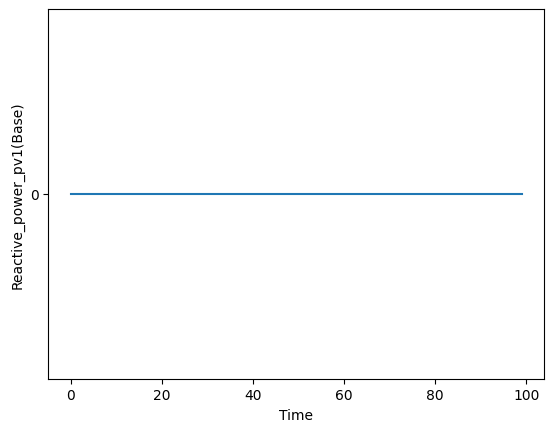

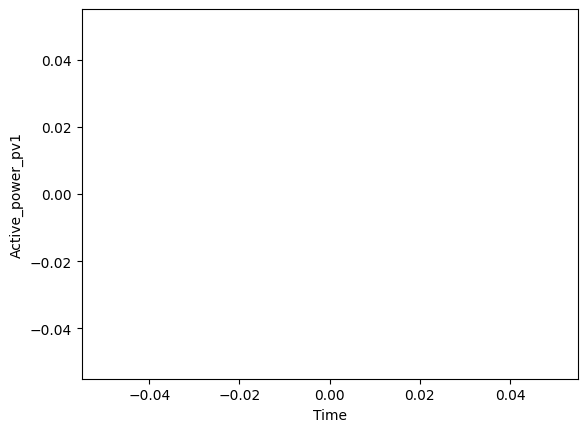

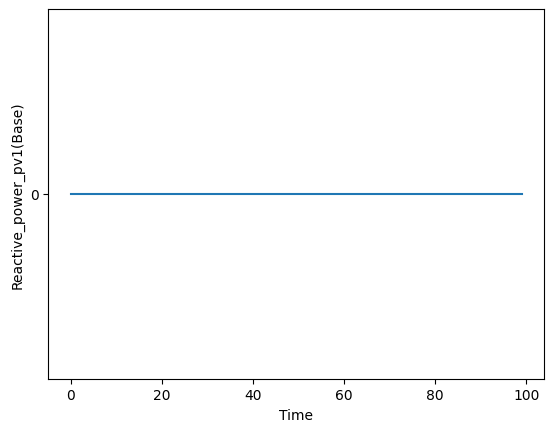

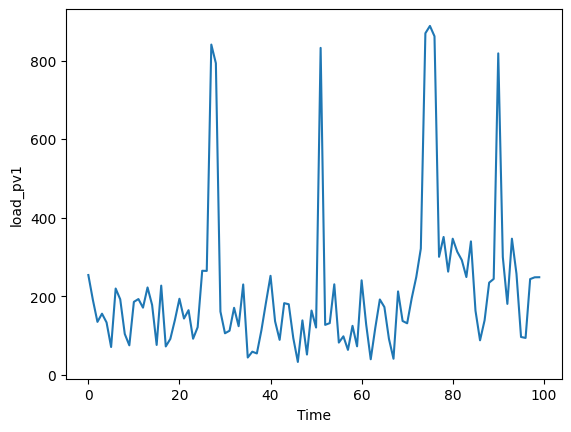

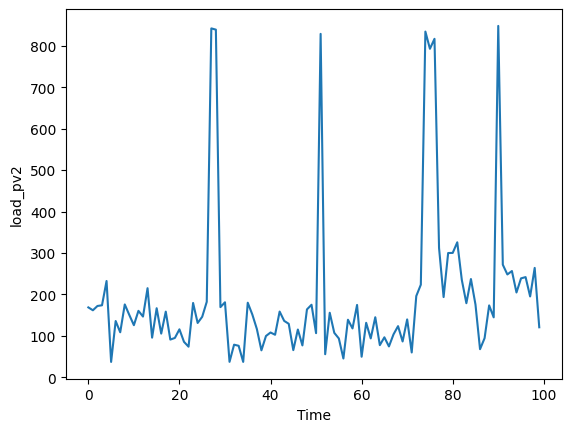

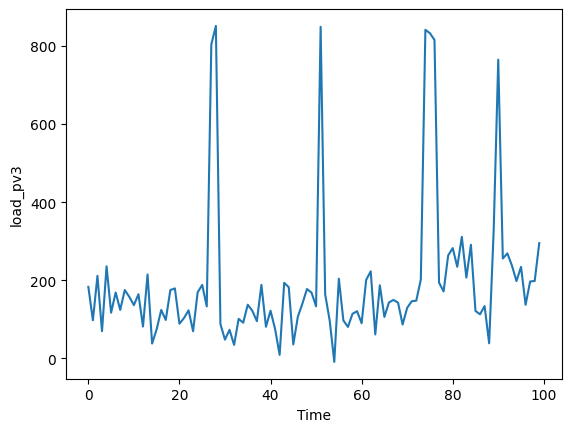

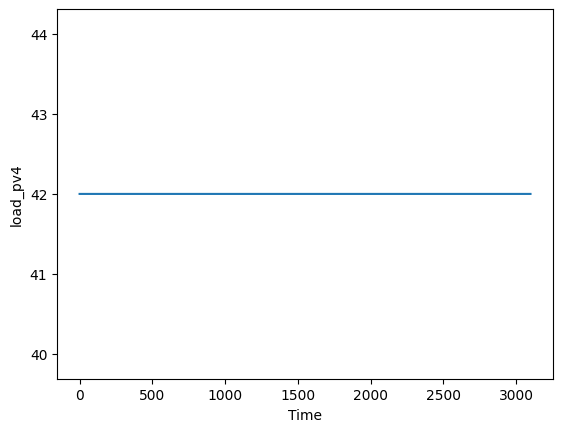

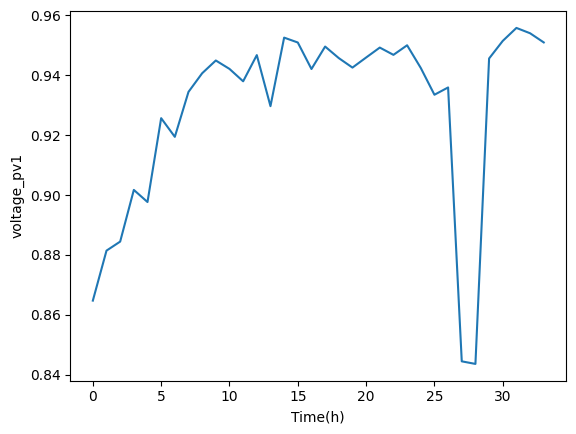

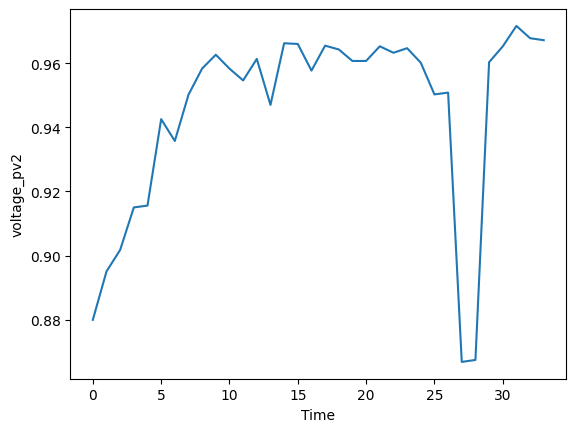

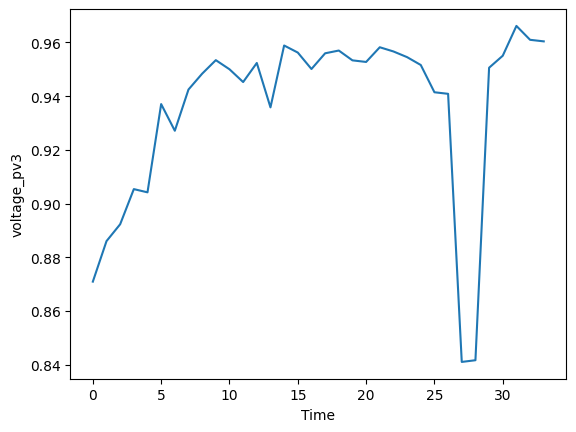

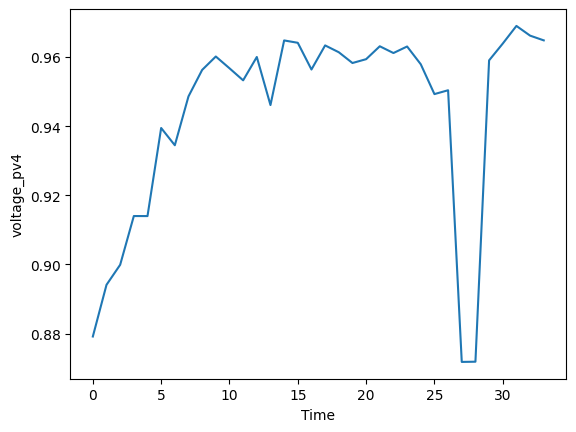

In [ ]:
#DSS.Text.Command='clear'
#DSS.Text.Command='compile '+dss_file

DSSCircuit=DSS.ActiveCircuit
dssBus = DSSCircuit.ActiveBus

DSSSolution=DSSCircuit.Solution
DSSCtrlQueue=DSSCircuit.CtrlQueue
DSSSolution.MaxControlIterations=1000
DSSSolution.MaxIterations=1000
DSSText=DSS.Text
DSS.Text.Command = 'Set controlmode=time'
DSS.Text.Command = 'Set mode = daily stepsize=15m'
DSS.Text.Command = 'Set number=1'
DSSSolution.InitSnap
DSSSolution.dblHour =0.0
dssCircuit = DSS.ActiveCircuit
dssElem=DSS.ActiveCircuit.ActiveCktElement
load_names = dssCircuit.Loads.AllNames
loads = DSS.ActiveCircuit.Loads
buses=[714,724,738,744]

loads_no=30
days = 30
interval_per_day = 96
load_df=pd.read_csv(load_path)
#print(load_df)
load_PV1=[]
load_PV2=[]
load_PV3=[]
load_PV4=[]

voltage_pv1=[]
voltage_pv2=[]
voltage_pv3=[]
voltage_pv4=[]
Q_pv1=[]
Q_pv2=[]
Q_pv3=[]
Q_pv4=[]
P_pv1=[]
P_pv2=[]
P_pv3=[]
P_pv4=[]
interval=0
print()
for j in range(len(buses)):
  pvName = "PVsystem.pv" + str(j + 1)
  dssCircuit.SetActiveElement(pvName)
  dssElem.Properties("kVAr").Val=0.0
  print('kvar', dssElem.Properties("kVAr").Val,dssElem.Properties("kVAr").Name)

  #dssElem.Properties("Vminpu").Val=0.8
  vmax= dssElem.Properties("Vmaxpu").Val

while interval < 100:
    load_names = dssCircuit.Loads.AllNames
    load=1
    sum_interval=load_df.iloc[interval].sum()
    #rint(interval , '-->',sum_interval)
    for load_name in load_names:
      dssCircuit.Loads.Name =load_name   #set active load by name
      #dssCircuit.Loads.kW= load_df['Load'+str(load)].iloc[interval]/10
      oldkvar = dssCircuit.Loads.kvar
      #dssCircuit.Loads.kW = N * oldkvar #set load value for active load from the given values
      Q = dssCircuit.Loads.kvar
      load+=1
      if dssCircuit.Loads.Name=='s714a':
          if interval<3:
              print(load_df['Load'+str(load)].iloc[interval])
          dssCircuit.Loads.kW=load_df['Load'+str(load)].iloc[interval]+np.random.uniform(-23,90)
          load_PV1.append(dssCircuit.Loads.kW)
      elif dssCircuit.Loads.Name=='s724b':
          if interval<3:
              print(load_df['Load'+str(load)].iloc[interval])
          dssCircuit.Loads.kW=load_df['Load'+str(load)].iloc[interval]+np.random.uniform(-20,50)
          load_PV2.append(dssCircuit.Loads.kW)
      elif dssCircuit.Loads.Name=='s738a':

        if interval<3:
          print(load_df['Load'+str(load)].iloc[interval])
        dssCircuit.Loads.kW=load_df['Load'+str(load)].iloc[interval]+np.random.uniform(-20,60)

        load_PV3.append(dssCircuit.Loads.kW)
      elif dssCircuit.Loads.Name=='s744a':
          load_PV4.append(dssCircuit.Loads.kW)
    pvName = 'PVsystem.pv1'
    dssCircuit.SetActiveElement(pvName)
    # dssElem.Properties("kVAr").Val=float(dssElem.Properties("kVAr").Val)-float(10)
    print(dssElem.Properties("kVAr").Val)
    q=dssElem.Properties("kVAr").Val
    DSSText.Command = 'Solve' #-----------------------------------------------------------------
    dssCircuit.SetActiveElement(pvName)
    v=dssElem.VoltagesMagAng[0]
    # print(v,end=',')

    #Voltage_pv=(dssBus.puVmagAngle[0]+dssBus.puVmagAngle[2]+dssBus.puVmagAngle[4])/3
    for load_name in load_names:
      if dssCircuit.Loads.Name=='s714a':
        # print(' solved ',dssCircuit.Loads.kW)
        # dssCircuit.Loads.kW=int(load_df['Load'+str(load)].iloc[interval])
        load_PV1.append(dssCircuit.Loads.kW)
      elif dssCircuit.Loads.Name=='s724b':
        # dssCircuit.Loads.kW= int( load_df['Load'+str(load)].iloc[interval])
        load_PV2.append(dssCircuit.Loads.kW)
      elif dssCircuit.Loads.Name=='s738a':
          load_PV3.append(dssCircuit.Loads.kW)
      elif dssCircuit.Loads.Name=='s744a':
          load_PV4.append(dssCircuit.Loads.kW)

    PV=dssCircuit.PVSystems.AllNames

    voltages=[]
    Q_power =[]
    P_power=[]
    state = []
    dssCircuit.SetActiveBus('738')
    Voltage_pv=(dssBus.puVmagAngle[0]+dssBus.puVmagAngle[2]+dssBus.puVmagAngle[4])/3
    voltage_pv1.append(Voltage_pv)
    dssCircuit.PVSystems.Name='PV1'
    P=dssCircuit.PVSystems.kW
    P_power.append(P)
        # print(dssElem.Properties("kVAr").Val)
    try:
        Q_power.append(float(Q))
    except ValueError:
        Q_power.append(float(0))
    state.append([Voltage_pv,Q_power[0],P_power[0]])
    # voltage_pv1.append(state[0][0])
    Q_pv1.append(q)


    dssCircuit.SetActiveBus('714')
    Voltage_pv=(dssBus.puVmagAngle[0]+dssBus.puVmagAngle[2]+dssBus.puVmagAngle[4])/3
    voltage_pv2.append(Voltage_pv)

    dssCircuit.SetActiveBus('724')
    Voltage_pv=(dssBus.puVmagAngle[0]+dssBus.puVmagAngle[2]+dssBus.puVmagAngle[4])/3
    voltage_pv3.append(Voltage_pv)

    dssCircuit.SetActiveBus('744')
    Voltage_pv=(dssBus.puVmagAngle[0]+dssBus.puVmagAngle[2]+dssBus.puVmagAngle[4])/3
    voltage_pv4.append(Voltage_pv)




    interval+=1
import numpy as np
time=np.arange(0,load_df.shape[0]//4, 0.25, dtype=float)
# Plotting graph
print(Q_pv1)
plt.plot(Q_pv1)
plt.xlabel("Time")
plt.ylabel("Reactive_power_pv1(Base)")
plt.savefig("/content/drive/MyDrive/FYP/FINAL_profiles/BASE/Reactive_power_PV1_base_final.",dpi=300)
plt.show()






plt.plot(P_pv1)
plt.xlabel("Time")
plt.ylabel("Active_power_pv1")
plt.show()
plt.plot(Q_pv1)
plt.xlabel("Time")
plt.ylabel("Reactive_power_pv1(Base)")
plt.savefig("/content/drive/MyDrive/FYP/FINAL_profiles/BASE/Reactive_power_PV1_base_final.",dpi=300)
plt.show()

plt.plot(load_PV1)
plt.xlabel("Time")
plt.ylabel('load_pv1')
plt.savefig("/content/drive/MyDrive/FYP/FINAL_profiles/BASE/Reactive_power_PV1_base_final.",dpi=300)
plt.show()
plt.plot(load_PV2)
plt.xlabel("Time")
plt.ylabel("load_pv2")
plt.show()
plt.plot(load_PV3)
plt.xlabel("Time")
plt.ylabel("load_pv3")
plt.savefig("/content/drive/MyDrive/FYP/FINAL_profiles/BASE/Reactive_power_PV1_base_final.",dpi=300)
plt.show()
plt.plot(load_PV4)
plt.xlabel("Time")
plt.ylabel('load_pv4')
plt.savefig("/content/drive/MyDrive/FYP/FINAL_profiles/BASE/Reactive_power_PV1_base_final.",dpi=300)
plt.show()
#SCALE to 15 min interval----------------------------
plt.plot(voltage_pv1)
plt.xlabel("Time(h)")
plt.ylabel("voltage_pv1")
plt.savefig('/content/drive/MyDrive/FYP/FINAL_profiles/BASE/Base_voltage_profile_final',dpi=300)
plt.show()
plt.plot(voltage_pv2)
plt.xlabel("Time")
plt.ylabel("voltage_pv2")
plt.show()
plt.plot(voltage_pv3)
plt.xlabel("Time")
plt.ylabel("voltage_pv3")
plt.show()


plt.plot(voltage_pv4)
plt.xlabel("Time")
plt.ylabel("voltage_pv4")
plt.show()


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib
# import numpy as np
# df=pd.read_excel('/content/drive/MyDrive/FYP/solar irradiance.xlsx')[:8000]
# print(df)
# df['irrad_profile'] = df.groupby(df.index // 4)['irradience'].transform('mean')
# df_new=df.iloc[::3, :]
# df_new.reset_index()
# print(df_new)
# print(df_new['irrad_profile'].iloc[20:105])
# ir=df_new['irrad_profile'].iloc[50:4000].values
# print(ir)
# #time=np.arange(0,30, 1/12/24, dtype=float)

# df_final=pd.concat([df.iloc[320:9040],df.iloc[320:1888]])
# df_irr=pd.concat([df_final.iloc[0:5768],df_final.iloc[288:1328]])

# df_irrnew1=pd.concat([df_irr,df_final.iloc[6776:9028]])
# df_irrnew=pd.concat([df_final.iloc[:514],df_irrnew1[226:]])
# # plt.plot(df_irrnew['irradience'].values)
# # plt.show()
# dfnew=df_irrnew['irradience'].iloc[480:9200]
# print(dfnew)
# normalized_df=(dfnew)/(dfnew.max()-dfnew.min())
# normalized_df[40:].to_csv('/content/drive/MyDrive/FYP/FINAL_profiles/Irradianceandload/Irradiance_monthly.csv')

# print(normalized_df.iloc[40:8680])
# plt.plot(normalized_df.iloc[40:8680].values)
# final_df=pd.DataFrame(normalized_df.iloc[::3].values)
# print(final_df)
# plt.savefig('/content/drive/MyDrive/FYP/FINAL_profiles/Irradianceandload/irradiance.png',dpi=300)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
DSSCircuit=DSS.ActiveCircuit
print(DSSCircuit.Loads.AllNames)

['s701a', 's701b', 's701c', 's712c', 's713c', 's714a', 's714b', 's718a', 's720c', 's722b', 's722c', 's724b', 's725b', 's727c', 's728', 's729a', 's730c', 's731b', 's732c', 's733a', 's734c', 's735c', 's736b', 's737a', 's738a', 's740c', 's741c', 's742a', 's742b', 's744a']


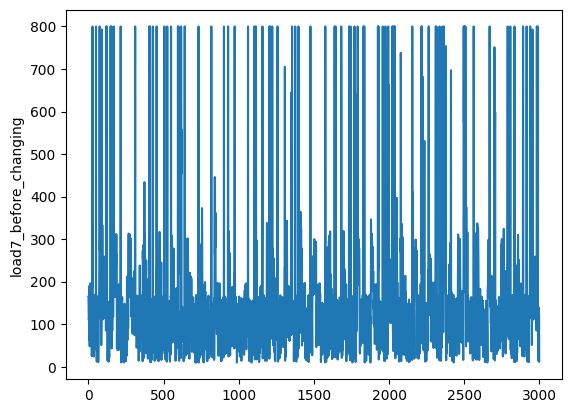

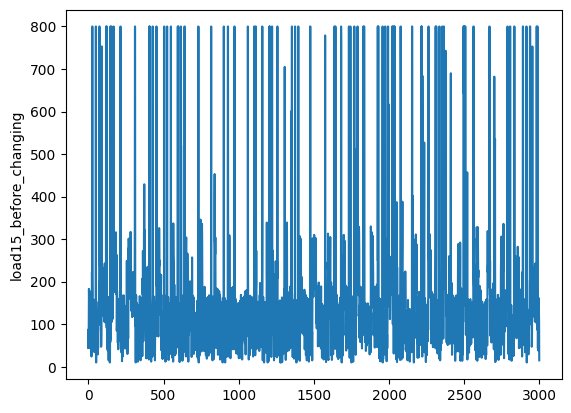

<ipython-input-14-2de04810412f>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  load_df['Load'+str(load)].iloc[i]=load_df['Load'+str(load)].iloc[i]/3
<ipython-input-14-2de04810412f>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  load_df['Load'+str(load)].iloc[i]=load_df['Load'+str(load)].iloc[i]/5
<ipython-input-14-2de04810412f>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  load_df['Load'+str(load)].iloc[i]=load_df['Load'+str(

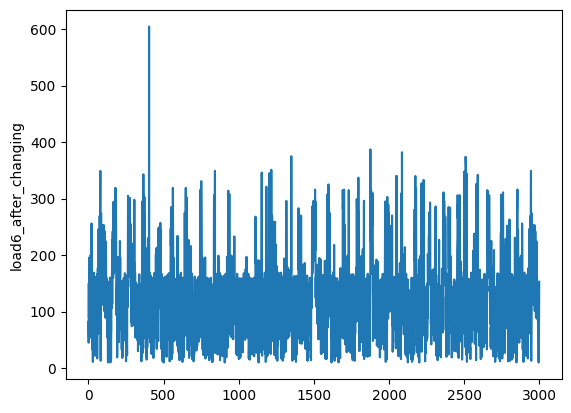

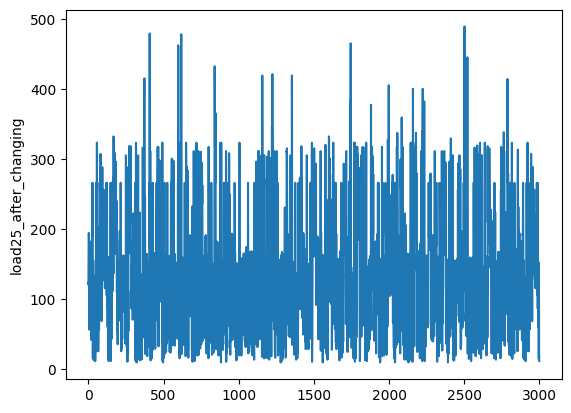

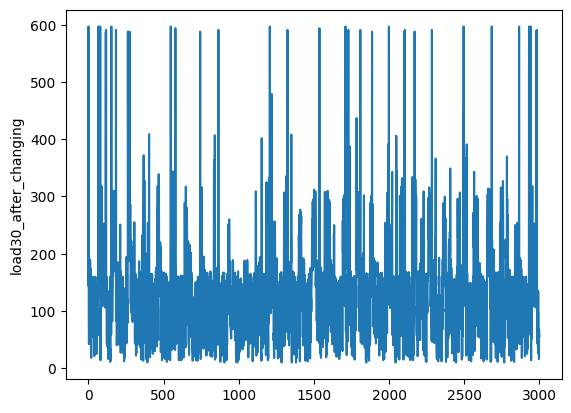

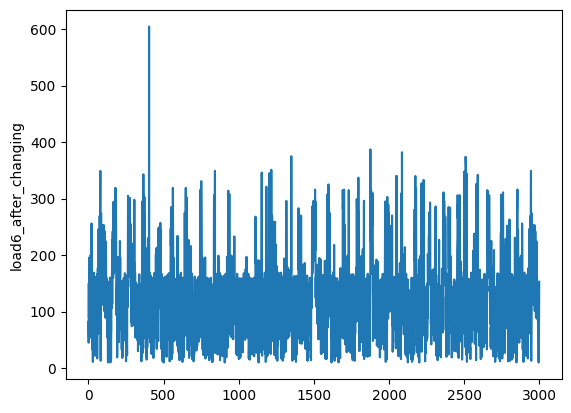

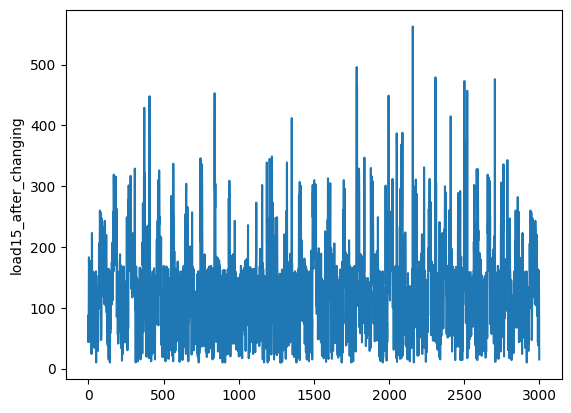

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

load_data='/content/drive/MyDrive/FYP/DATAS/load_final'
irradiance_path='/content/drive/MyDrive/FYP/FINAL_profiles/Irradianceandload/Irradiance_monthly.csv'
load_df=pd.read_csv(load_data)
# new_df=load_df.drop('Unnamed: 0')
plt.plot(load_df['Load7'])
plt.ylabel('load7_before_changing')
plt.show()
plt.plot(load_df['Load15'])
plt.ylabel('load15_before_changing')
plt.show()
# for i in range(load_df.shape[0]):

#   for load in range(1,31):

#     load_value=load_df['Load'+str(load)].iloc[i]  #load value of current interval
#     if load_value>=800:
#         load_df['Load'+str(load)].iloc[i]=load_value/2+np.random.uniform(-20,100) #set load value for active load from the given values\
# #     elif load_value>200 and load_value<300:
# #         if(load%3==0):
# #          load_df['Load'+str(load)].iloc[i]=load_value+np.random.uniform(-20,150) #set load value for active load from the given values\
# #         elif (load%5==0):
# #          load_df['Load'+str(load)].iloc[i]=load_value+np.random.uniform(-20,80)
# #         else:
# #          load_df['Load'+str(load)].iloc[i]=load_value+np.random.uniform(100,400) #set load value for active load from the given values\
# #     elif( load_value>60 and load_value<150):
# #         load_df['Load'+str(load)].iloc[i] =load_value*2+np.random.uniform(-40,150)

load_df_copy=load_df.copy()
load=30
for i in range(load_df.shape[0]):
    if load_df['Load'+str(load)].iloc[i]<200 and load_df['Load'+str(load)].iloc[i]>195 :
      load_df['Load'+str(load)].iloc[i]=load_df['Load'+str(load)].iloc[i]*3

    elif  load_df['Load'+str(load)].iloc[i]>500 :
      load_df['Load'+str(load)].iloc[i]=load_df['Load'+str(load)].iloc[i]/5
# for i in range(1500):
#   load_df['Load'+str(load)].iloc[i]=load_df['Load'+str(load)].iloc[load_df.shape[0]-i-1]
# for i in range(1500,load_df.shape[0]):
#   load_df['Load'+str(load)].iloc[i]=load_df['Load'+str(load)].iloc[load_df.shape[0]-i-1500]
load=25
for i in range(load_df.shape[0]):
    if load_df['Load'+str(load)].iloc[i]>50 and load_df['Load'+str(load)].iloc[i]<55 :
      load_df['Load'+str(load)].iloc[i]=load_df['Load'+str(load)].iloc[i]*6
    elif  load_df['Load'+str(load)].iloc[i]>500  :
      load_df['Load'+str(load)].iloc[i]=load_df['Load'+str(load)].iloc[i]/3
# for i in range(load_df.shape[0]):
#   if load_df['Load'+str(load)].iloc[i]<100 and i-10>96 and i+10<96:
#     load_df['Load'+str(load)].iloc[i]=load_df['Load'+str(load)].iloc[i]*3
# for i in range(0,480):
#     load_df['Load'+str(load)].iloc[i]=load_df['Load'+str(load)].iloc[i]*1.3
# for i in range(480,960):
#   load_df['Load'+str(load)].iloc[i]=load_df['Load'+str(load)].iloc[i]/1.2
# for i in range(960,load_df.shape[0]):
#   if load_df['Load'+str(load)].iloc[i]<200:
#     load_df['Load'+str(load)].iloc[i]=load_df['Load'+str(load)].iloc[i]/1.5
load=6
for i in range(load_df.shape[0]):
    if load_df['Load'+str(load)].iloc[i]>400 and load_df['Load'+str(load)].iloc[i]<410 :
      load_df['Load'+str(load)].iloc[i]=load_df['Load'+str(load)].iloc[i]*1.5
    elif  load_df['Load'+str(load)].iloc[i]>410  :
      load_df['Load'+str(load)].iloc[i]=load_df['Load'+str(load)].iloc[i]/5
load=15
for i in range(load_df.shape[0]):
    if load_df['Load'+str(load)].iloc[i]>400 and load_df['Load'+str(load)].iloc[i]<410 :
      load_df['Load'+str(load)].iloc[i]=load_df['Load'+str(load)].iloc[i]*1.4
    elif  load_df['Load'+str(load)].iloc[i]>500  :
      load_df['Load'+str(load)].iloc[i]=load_df['Load'+str(load)].iloc[i]/5
# for i in range(0,480):
#     load_df['Load'+str(load)].iloc[i]=load_df['Load'+str(load)].iloc[i]/1.8
# for i in range(480,960):
#   load_df['Load'+str(load)].iloc[i]=load_df['Load'+str(load)].iloc[i]/1.2
# for i in range(960,load_df.shape[0]):
#   if load_df['Load'+str(load)].iloc[i]<200:
#     load_df['Load'+str(load)].iloc[i]=load_df['Load'+str(load)].iloc[i]*1.5
plt.plot(load_df['Load6'])
plt.ylabel('load6_after_changing')
plt.show()
plt.plot(load_df['Load25'])
plt.ylabel('load25_after_changing')
plt.show()
plt.plot(load_df['Load30'])
plt.ylabel('load30_after_changing')
plt.show()
plt.plot(load_df['Load6'])
plt.ylabel('load6_after_changing')
plt.show()
plt.plot(load_df['Load15'])
plt.ylabel('load15_after_changing')
load_df.to_csv('/content/drive/MyDrive/FYP/DATAS/load_data_final9')